# 차원 축소

- 과일 사진의 경우는 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음
- 차원의 저주
    - 일반적인 머신러닝 문제는 수천 ~ 수백만 개의 특성을 가지는 경우도 있음
    - 특성이 너무 많으면 훈련이 느리게 될 뿐 아니라 좋은 솔루션을 찾기 어렵게 됨
    - 이러한 문제를 차원의 저주(curse of dimensionality)라고 함
    
- 차원 축소(dimensionality reduction)
    - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 모델의 성능을 향상시키는 방법
        - 예) 이미지 경계면의 배경 부분 제거, 서로 인접한 픽셀들을 결합 등

## 주성분 분석(principal component analysis)

- 데이터에 있는 분산이 가장 큰 방향을 찾는 것
    - 분산 : 데이터가 퍼져 있는 정도
    
<img src = "./image/pca1.gif">

- 위 그림의 데이터에서는 오른쪽 위를 향하는 분산이 가장 큼
- 원본 데이터를 가장 잘 설명하는 방향이 주성분(principal component)
    - 주성분은 데이터가 가진 특성을 가장 잘 나타내기 때문에 주성분에 데이터를 투영하면 정보의 손실을 줄이면서 차원을 축소할 수 있음

<img src = "./image/pca2.png">

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [2]:
fruits = np.load("./data/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
# n_components : 주성분의 개수
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# pca가 찾은 주성분 확인
pca.components_.shape

(50, 10000)

In [5]:
def draw_fruits(arr, ratio = 1):
    n = len(arr)  # 샘플 수
    
    # 한 줄에 10개씩 이미지를 그릴 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n / 10))
    cols = 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio),
                           squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = "gray_r")
            axs[i, j].axis("off")
            
    plt.show()

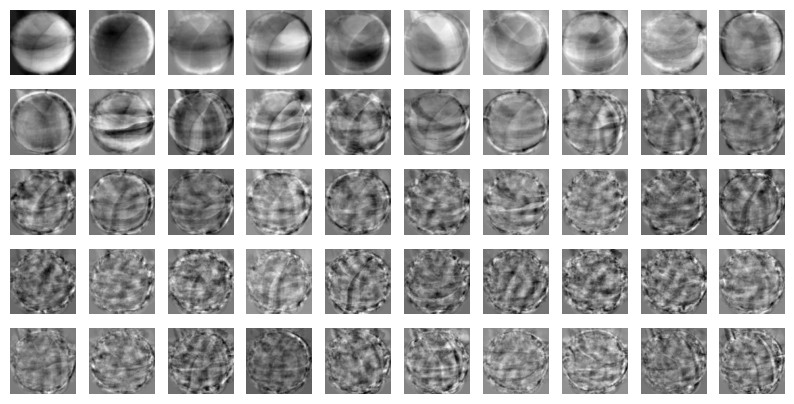

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
    - 데이터셋에 있는 특징을 찾아낸 것

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
# 원본 데이터의 차원을 50차원으로 축소
fruits_pca = pca.transform(fruits_2d)

In [9]:
fruits_pca.shape

(300, 50)

## 원본 데이터 재구성

- 10000개의 특성을 50개로 줄이면 정보 손실이 없을 수 없지만 정보 손실을 최소한으로 했기 때문에 축소된 데이터에서 원본 데이터에 가깝게 복구할 수 있음 

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


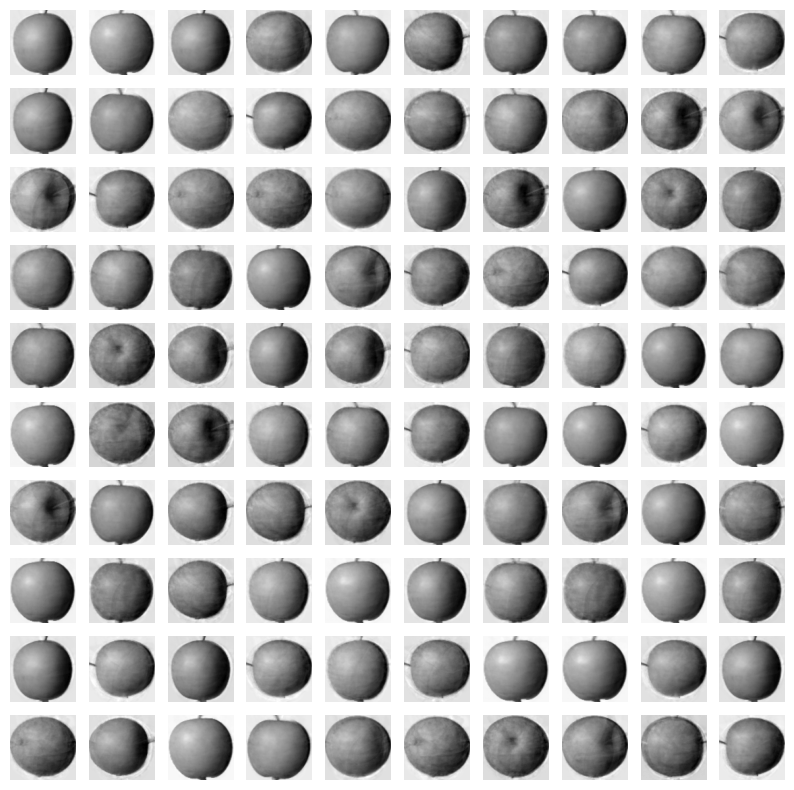

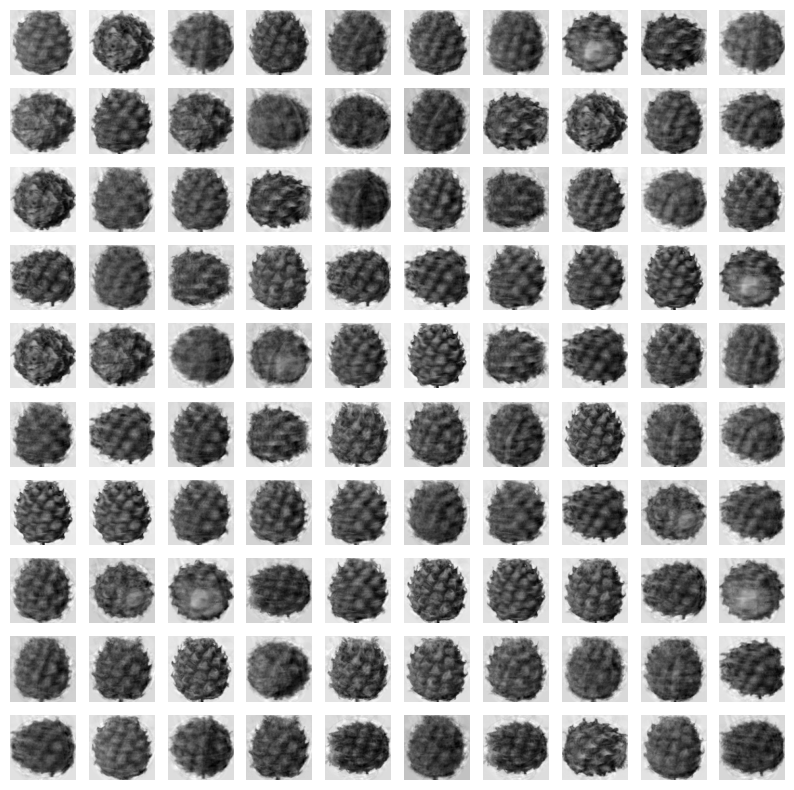

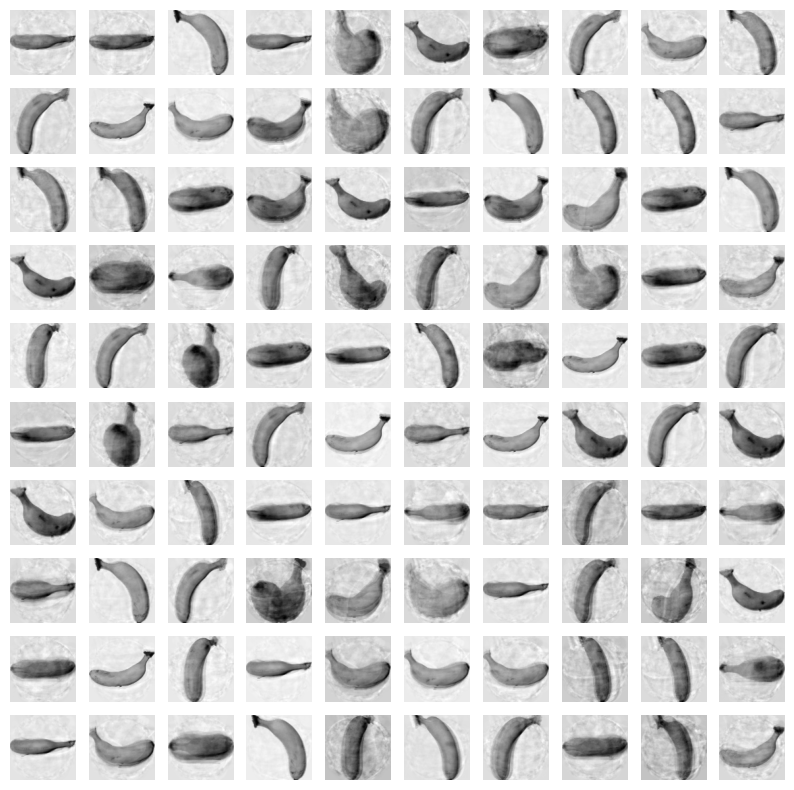

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print()

## 설명된 분산(explained variance)

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- pca클래스의 explaine_variance_ratio_ 에 설명된 분산 비율이 기록되어 있음

In [12]:
# 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9214938616149992


In [14]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511203, 0.0048638 , 0.00480347,
       0.00447827, 0.00437317, 0.0040804 , 0.00389466, 0.00372428,
       0.00359276, 0.00331449, 0.00317842, 0.00304302, 0.00303702,
       0.00288831, 0.00275873, 0.0026489 , 0.00255941, 0.00251997,
       0.00246839, 0.00239377, 0.00230399, 0.00221081, 0.002163  ,
       0.00213869, 0.00196201, 0.0019105 , 0.00189407, 0.00185764,
       0.00177582, 0.00172265, 0.00168665, 0.00163312, 0.00162071])

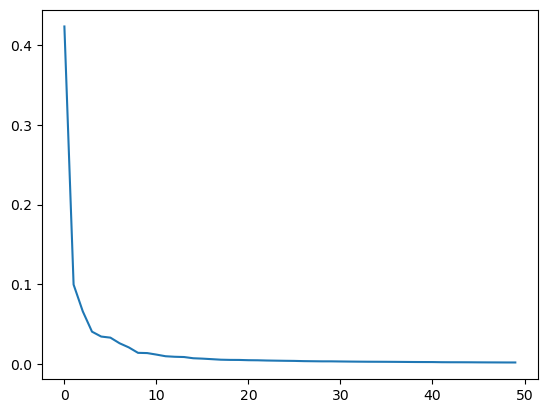

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 설명된 분산의 비율로 pca 사용

In [16]:
pca = PCA(n_components = 0.75)
pca.fit(fruits_2d)

PCA(n_components=0.75)

In [17]:
pca.n_components_   # 9개 주성분 사용한단거임

9

In [18]:
print(np.sum(pca.explained_variance_ratio_))

0.756065165999834


In [19]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 설정
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
# 2개의 특성만으로 원본 데이터 분산의 50%를 표현할 수 있음 
pca.n_components_

2

## 다른 알고리즘과 함께 사용하기 

In [21]:
# 레이블 생성
# 사과 = 0, 파인애플 = 1, 바나나 = 2
y = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [22]:
logi = LogisticRegression()

In [28]:
# 원본 데이터로 성능 테스트
scores = cross_validate(logi, fruits_2d, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))   # 훈련시간

0.9966666666666667
0.8738027095794678


In [30]:
# pca로 50개의 주성분으로 축소한 데이터로 성능 테스트
scores = cross_validate(logi, fruits_pca, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.02997479438781738


In [31]:
# 2개의 주성분으로 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [32]:
scores = cross_validate(logi, fruits_pca, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.046311044692993165


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

### 차원 축소된 데이터로 kmeans 사용

In [35]:
km = KMeans(n_clusters = 3, random_state = 11)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


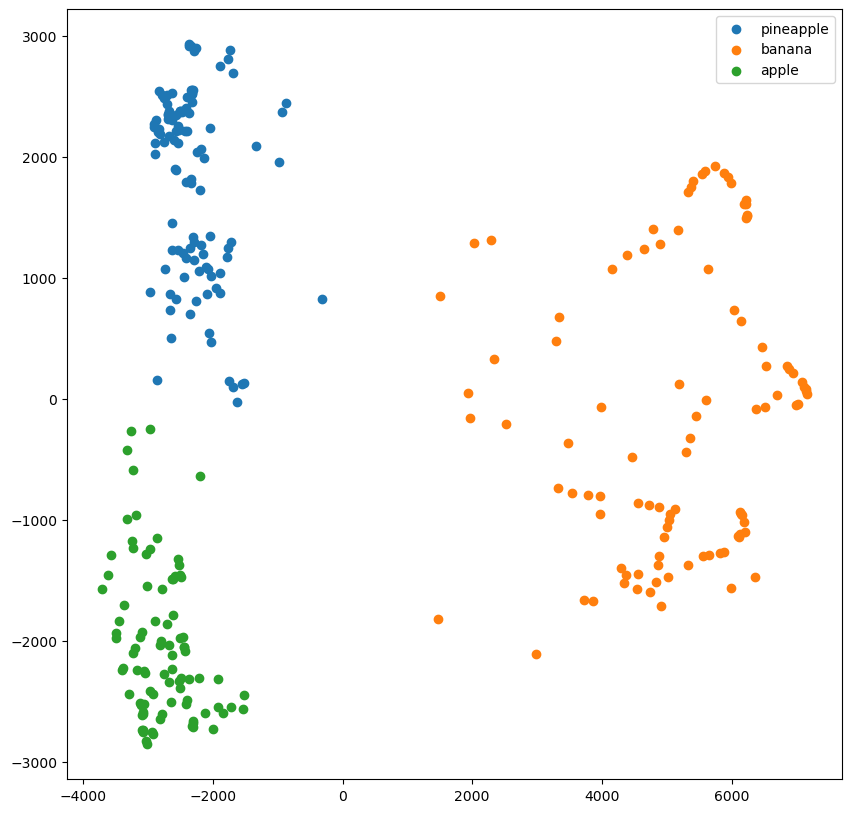

In [41]:
# 시각화
plt.figure(figsize = (10, 10))

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
    
plt.legend(["pineapple", "banana","apple"])
plt.show()